In [1]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(X_train, y_train), (X_test,y_test)=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [5]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

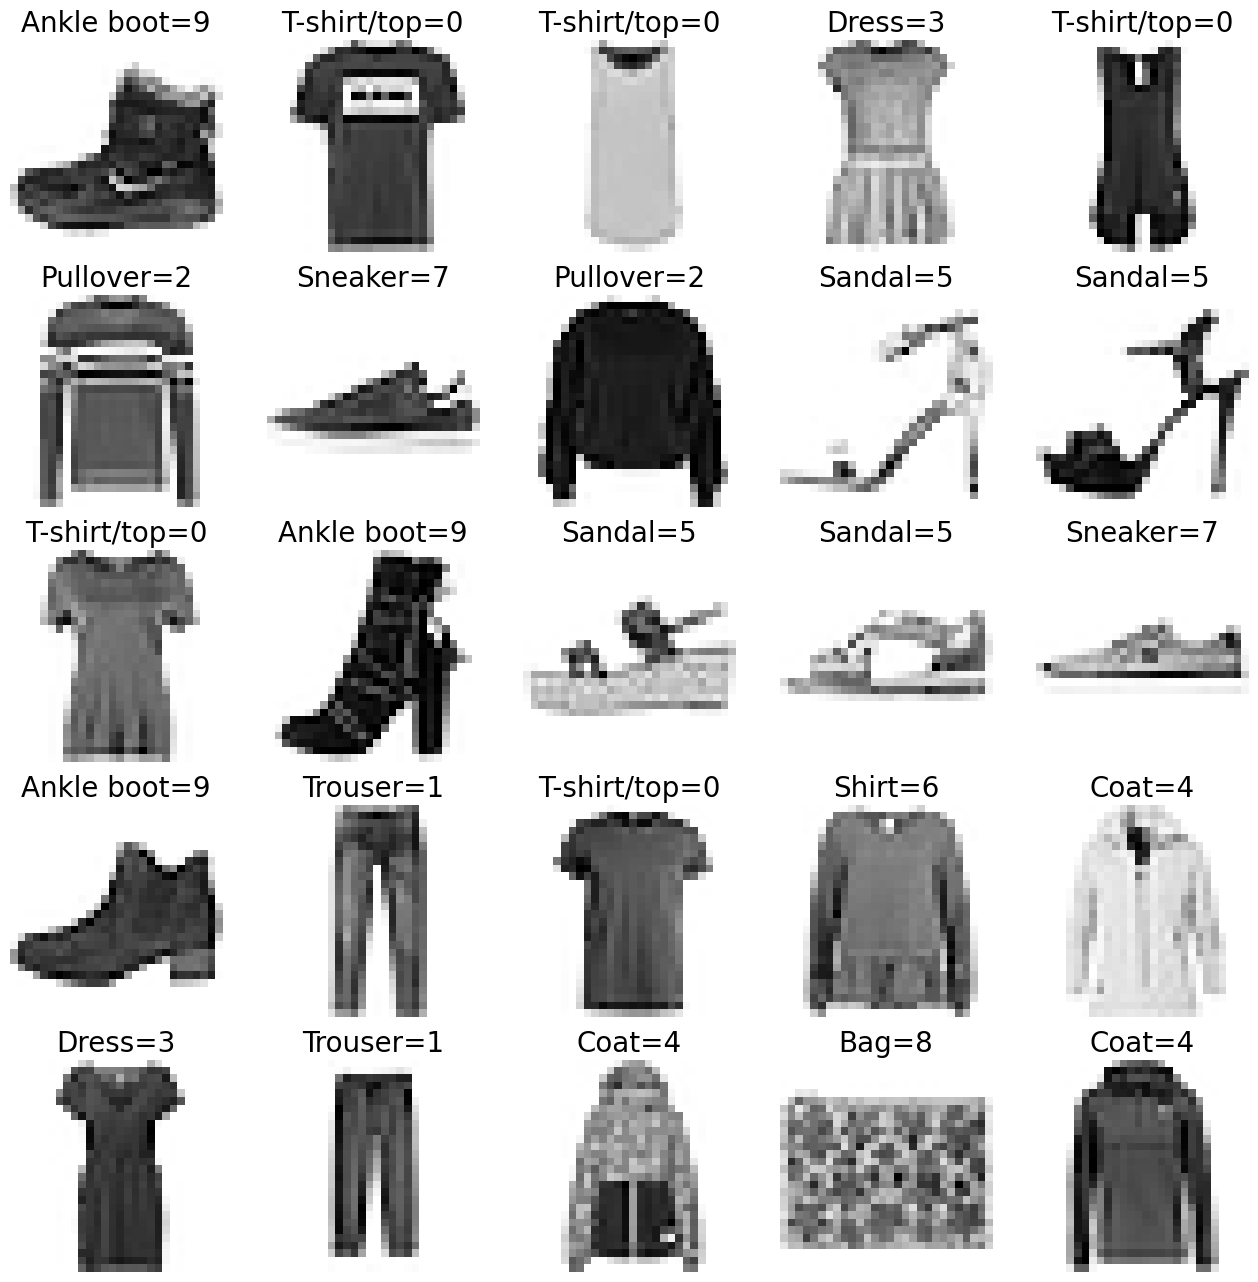

In [6]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title(class_labels[y_train[i]]+"="+str(y_train[i]), fontsize=20)

In [7]:
X_train=X_train/255
X_test=X_test/255

In [8]:
model=keras.models.Sequential([
                        keras.layers.Flatten(input_shape=[28,28]),
                        keras.layers.Dense(units=32, activation="relu"),
                        keras.layers.Dense(units=10, activation="softmax" )
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.5527 - accuracy: 0.8100
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4188 - accuracy: 0.8537
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3887 - accuracy: 0.8623
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3685 - accuracy: 0.8690
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3537 - accuracy: 0.8738
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3429 - accuracy: 0.8780
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3347 - accuracy: 0.8801
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3259 - accuracy: 0.8836
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3182 - accuracy: 0.8839
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.31

In [12]:
  model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3973 - accuracy: 0.8588


[0.3973274827003479, 0.8587999939918518]

In [13]:
y_pred=model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [14]:
y_pred[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.11, 0.  , 0.82],
      dtype=float32)

In [15]:
np.argmax(y_pred[0].round(2))

9

In [16]:
y_test[0]

9

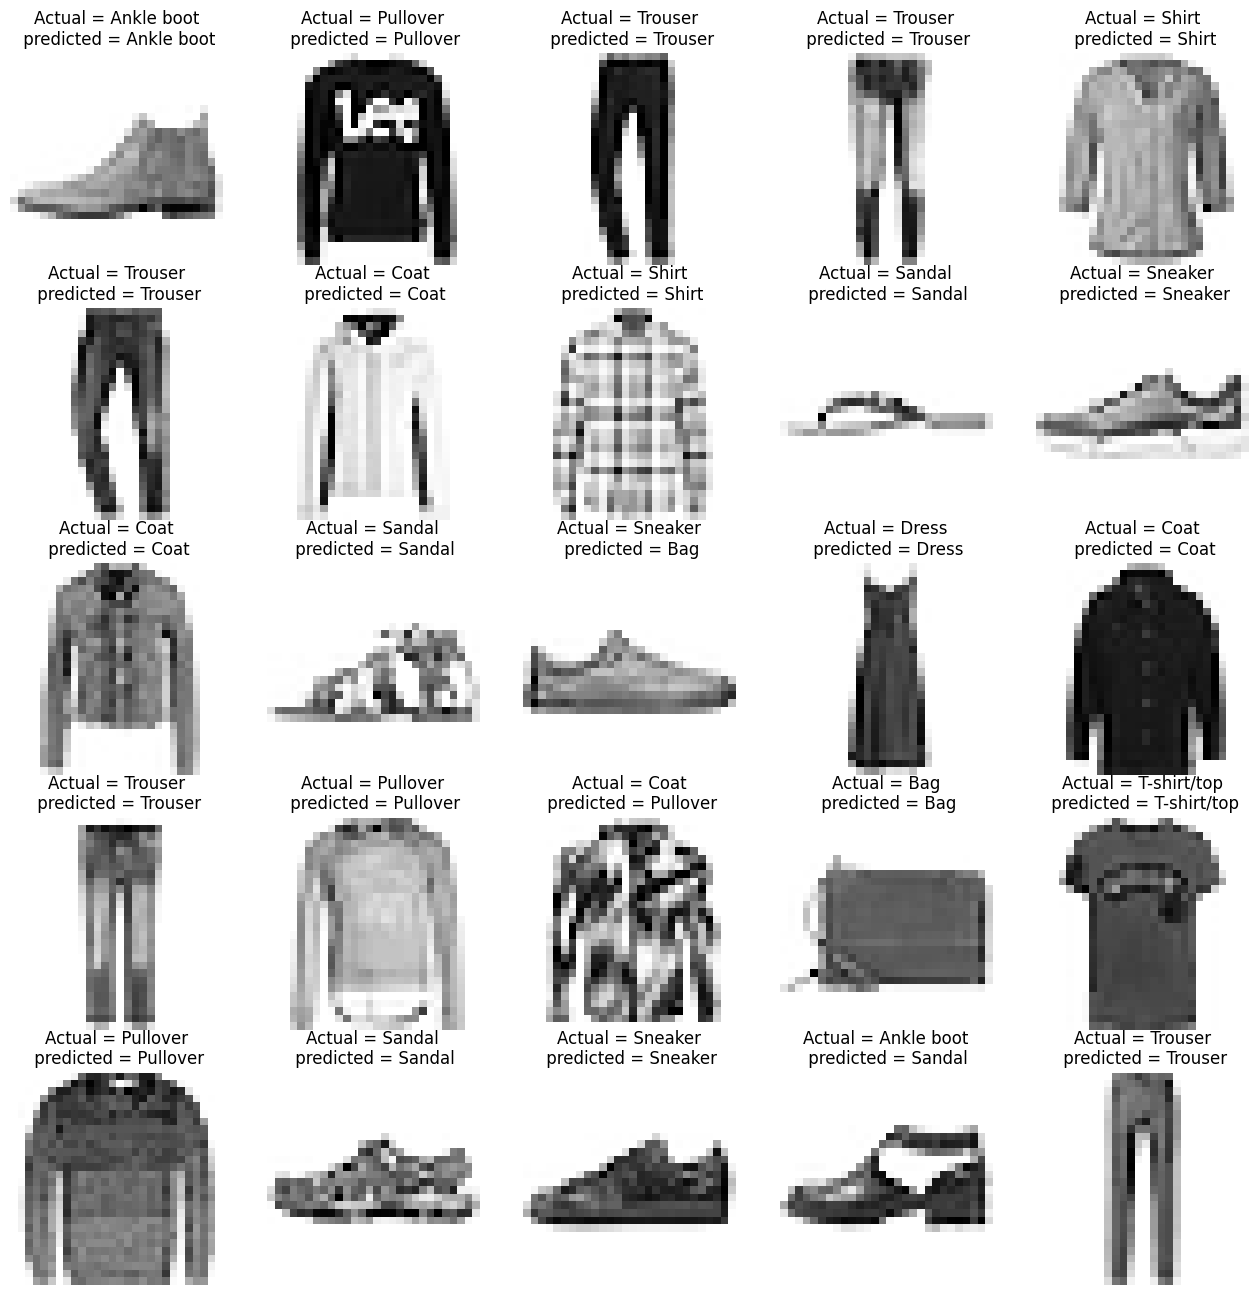

In [18]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i],cmap="Greys")
  plt.axis('off')
  plt.title("Actual = {}\n predicted = {}".format(class_labels[y_test[i]],class_labels[np.argmax(y_pred[i])]))

Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, [np.argmax(i) for i in y_pred])

<Axes: >

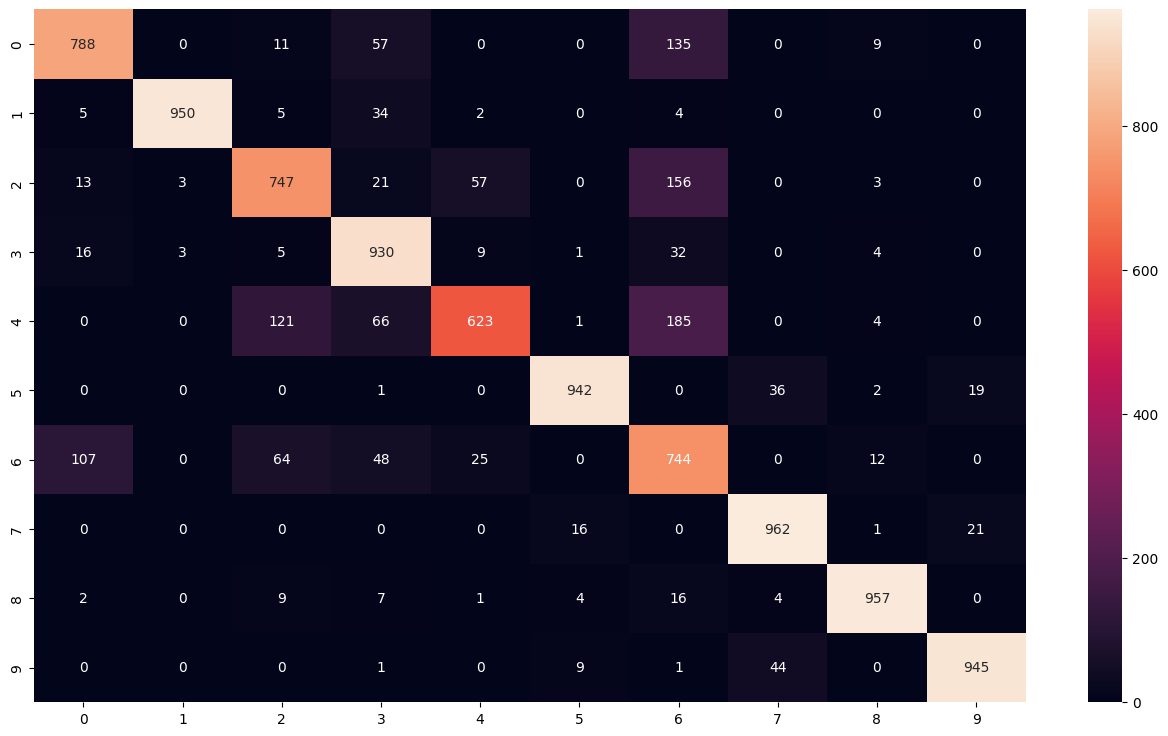

In [20]:
plt.figure(figsize=(16,9))
sns.heatmap(cm,annot=True, fmt='d')

In [23]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, [np.argmax(i) for i in y_pred], target_names= class_labels,)

In [24]:
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.79      0.82      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.78      0.75      0.76      1000
       Dress       0.80      0.93      0.86      1000
        Coat       0.87      0.62      0.73      1000
      Sandal       0.97      0.94      0.95      1000
       Shirt       0.58      0.74      0.65      1000
     Sneaker       0.92      0.96      0.94      1000
         Bag       0.96      0.96      0.96      1000
  Ankle boot       0.96      0.94      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



In [25]:
model.save("MNIST_fashion.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
model=keras.models.load_model("MNIST_fashion.h5")

In [27]:
model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([[1.14669696e-07, 1.36235585e-07, 4.81155837e-07, ...,
        1.06838711e-01, 2.00597322e-04, 8.21720302e-01],
       [2.98505147e-05, 3.06353076e-09, 9.74227369e-01, ...,
        1.09533710e-14, 3.34018921e-07, 2.08410254e-14],
       [2.79041160e-05, 9.99885499e-01, 2.21310129e-05, ...,
        1.68995352e-13, 1.36646069e-10, 2.71981512e-16],
       ...,
       [7.89738726e-04, 2.27760751e-07, 4.35662892e-04, ...,
        7.23358795e-08, 9.97031271e-01, 1.53186241e-10],
       [2.72179454e-06, 9.99028981e-01, 1.42228475e-06, ...,
        5.03862481e-08, 4.61958543e-08, 4.04817968e-07],
       [2.07963494e-05, 5.28728515e-06, 3.34419237e-05, ...,
        1.44462567e-02, 1.90415187e-03, 4.86744648e-05]], dtype=float32)